<a href="https://colab.research.google.com/github/Hemant-1Kumar/Cat-VS-Dog-Image-Classification/blob/main/CatVsDog_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

datset link:- https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:16<00:00, 155MB/s]
100% 1.06G/1.06G [00:16<00:00, 69.6MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
#genertors
#here we give same size for all pic 256,256
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


these value store in numpy array format so we need to normalize these to 0 to 1

In [ ]:
#Normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

now dataset is ready

In [ ]:
# create CNN model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 84s 111ms/step - loss: 1.5671 - accuracy: 0.5985 - val_loss: 0.7648 - val_accuracy: 0.5758
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5662 - accuracy: 0.7020 - val_loss: 0.5511 - val_accuracy: 0.7326
Epoch 3/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5144 - accuracy: 0.7501 - val_loss: 0.6418 - val_accuracy: 0.7078
Epoch 4/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4639 - accuracy: 0.7829 - val_loss: 0.5274 - val_accuracy: 0.7540
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3988 - accuracy: 0.8189 - val_loss: 0.5773 - val_accuracy: 0.7140
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3347 - accuracy: 0.8522 - val_loss: 0.4875 - val_accuracy: 0.7880
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2588 - accuracy: 0.8929 - val_loss: 0.5868 - val_ac

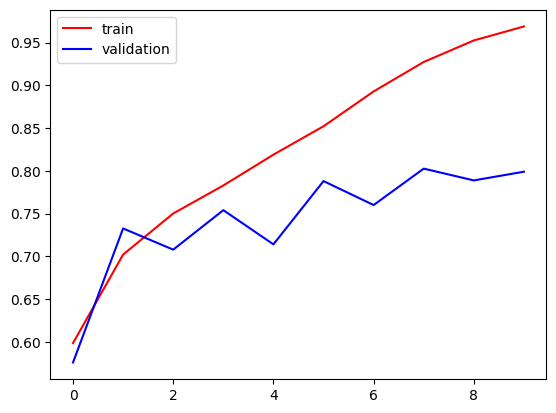

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

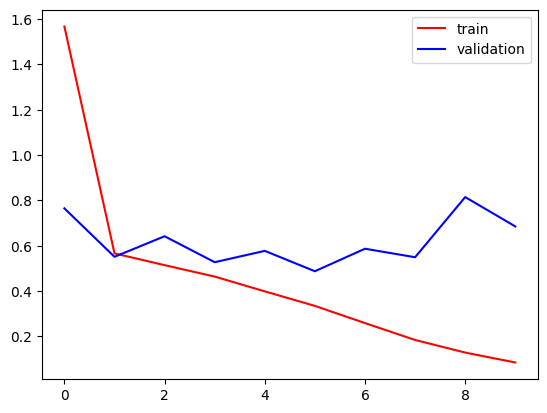

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#way to reduce overfitting

#add more data
#data augmentation
#L1/L2 regularizer
#dropout
#regularization
#Reduce complexity

In [ ]:
import cv2


In [ ]:
test_image = cv2.imread('/content/cat.jpg')

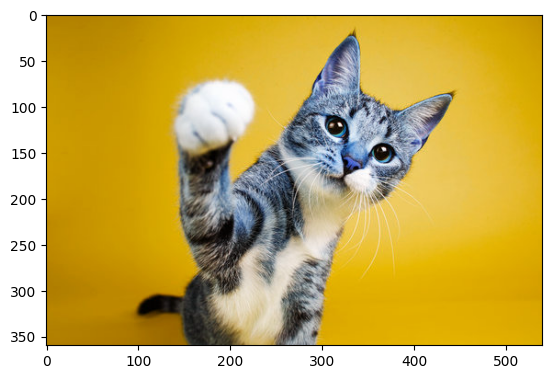

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(360, 540, 3)

In [ ]:
test_image=cv2.resize(test_image,(256,256))

In [ ]:
test_input=test_image.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

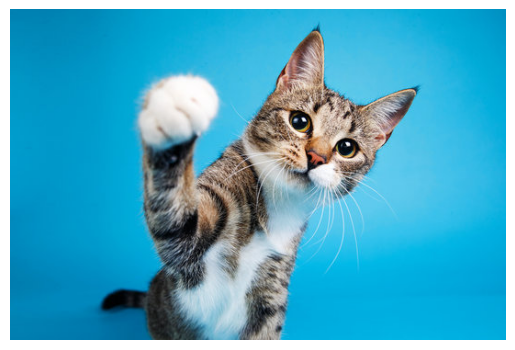

1/1 [==============================] - 0s 326ms/step
The model predicts: cat


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load and preprocess the test image
test_image = cv2.imread('/content/cat.jpg')
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))  # Correct color display for plt
plt.axis('off')
plt.show()

test_image = cv2.resize(test_image, (256, 256))
test_input = test_image.reshape((1, 256, 256, 3))
test_input = test_input / 255.0  # Normalize the image

# Predict the class
prediction = model.predict(test_input)

# Map the prediction to the corresponding label
label = 'dog' if prediction >= 0.5 else 'cat'
print(f'The model predicts: {label}')


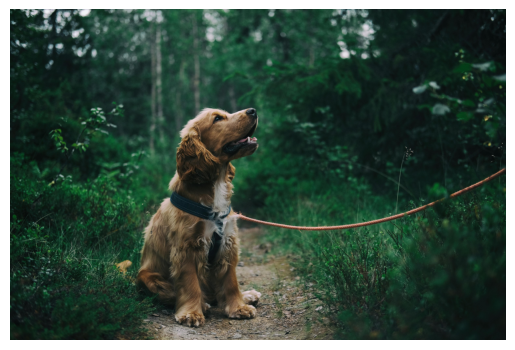

1/1 [==============================] - 0s 21ms/step
The model predicts: dog


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load and preprocess the test image
test_image = cv2.imread('/content/dog.jpg')
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))  # Correct color display for plt
plt.axis('off')
plt.show()

test_image = cv2.resize(test_image, (256, 256))
test_input = test_image.reshape((1, 256, 256, 3))
test_input = test_input / 255.0  # Normalize the image

# Predict the class
prediction = model.predict(test_input)

# Map the prediction to the corresponding label
label = 'dog' if prediction >= 0.5 else 'cat'
print(f'The model predicts: {label}')
